# Seasonality

References:
- median and standard error https://influentialpoints.com/Training/standard_error_of_median.htm

In [5]:
import os
import pickle

import pandas as pd
import numpy as np
import xarray as xr
import scipy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [128]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw/'
SAVE_FIGS = False

In [7]:
path = os.path.join(REPO_ROOT, 'data/interim', 'mhw_eventstats_dict.pickle')
with open(path, 'rb') as handle:
    event_statistics = pickle.load(handle)

## New Analysis: Seasonality of MHW

In [8]:
def get_season(row):
    season = None
    if row.date_start.month in [6, 7, 8]:
        # season = 'JJA'
        season = 2
    elif row.date_start.month in [9, 10, 11]:
        # season = 'SON'
        season = 3
    elif row.date_start.month in [12, 1, 2]:
        # season = 'DJF'
        season = 4
    elif row.date_start.month in [3, 4, 5]:
        # season = 'MAM'
        season = 1
    else:
        season = np.nan
    return season

In [9]:
# Count of mhw grouped by month
months = []
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
            df['month'] = df.date_start.dt.month
            # This line isn't necessary if we just add a groupby('month').count()
            # at the end of a collective full_df
            months = months + df.date_start.dt.month.tolist()

months_np = np.array(months)

Text(0.5, 0, 'month')

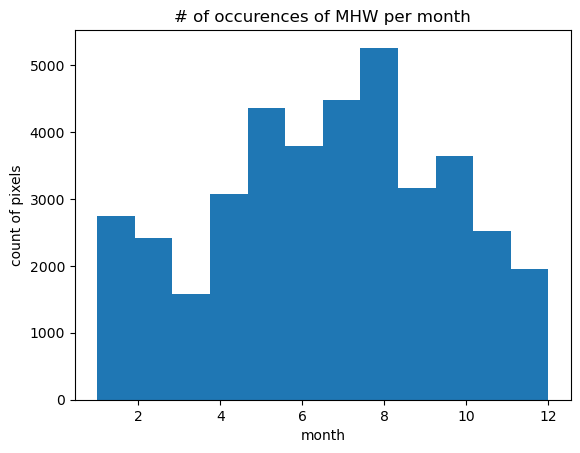

In [10]:
plt.hist(months_np, bins=12)
plt.title('# of occurences of MHW per month')
plt.ylabel('count of pixels')
plt.xlabel('month')

BELOW: this doesn't work (to naively try to transfer). To figure something like this out we'll need to keep track of the months and then do an average at the end

In [11]:
# Count of mhw grouped by month
months = []
full_df = pd.DataFrame()
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
            df['month'] = df.date_start.dt.month
            # months = months + df.date_start.dt.month.tolist()
            full_df = pd.concat([full_df, df])

# months_np = np.array(months)

In [12]:
full_df[full_df.time_start == 731725]

,time_start,time_end,time_peak,date_start,date_end,date_peak,index_start,index_end,index_peak,duration,...,intensity_cumulative_relThresh,intensity_max_abs,intensity_mean_abs,intensity_var_abs,intensity_cumulative_abs,category,rate_onset,rate_decline,n_events,month
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.328698,22.829987,22.351995,0.432456,111.759979,Moderate,0.252345,0.662094,41,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.256443,22.739990,22.253998,0.434671,111.269989,Moderate,0.248087,0.706907,40,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.178833,22.639984,22.139990,0.443304,110.699951,Moderate,0.244423,0.759286,40,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.253701,22.579987,22.041998,0.454674,110.209991,Moderate,0.250213,0.838952,42,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.754356,22.970001,22.403997,0.470297,112.019989,Moderate,0.296643,0.728911,42,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.624369,22.829987,22.276001,0.462837,111.380005,Moderate,0.283585,0.773907,41,5
1,731725,731729,731728,2004-05-24,2004-05-28,2004-05-27,631,635,634,5,...,3.425980,22.670013,22.118000,0.463870,110.589996,Moderate,0.269527,0.836720,43,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,631,636,634,6,...,4.054843,23.670013,23.039999,0.430894,138.239990,Moderate,0.312621,0.548114,44,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,631,636,634,6,...,4.285353,23.600006,22.926666,0.440856,137.559998,Moderate,0.328454,0.599806,45,5
1,731725,731730,731728,2004-05-24,2004-05-29,2004-05-27,631,636,634,6,...,4.263695,23.429993,22.730001,0.462166,136.380005,Moderate,0.336848,0.661854,42,5


These are cool -- my concern is that we aren't really seeing averages over different events, but that the spatially largest MHW are dominating the 

In [13]:
occurences = full_df.groupby(full_df.month)['date_start'].count()

To give occurences error bars we may need to switch to doing average # of pixels each month, instead of purely taking a sum of all the MHW pixels that ever happened in each month.

Notes: doing it this new way really dramatically changed the graph. In the early part of the year it's basically the opposite pattern from what was previously shown.

In [14]:
monthly_counts = full_df.groupby([full_df.month, full_df.date_start.dt.year])['date_start'].count()

In [15]:
years = list(range(1, 13)) * 21
new_multiindex = []
for month in range (1, 13):
    for year in range(2002, 2023):
        new_multiindex.append((month, year))

In [16]:
new_index = pd.MultiIndex.from_tuples(new_multiindex, names = ['month', 'year'])
monthly_counts = monthly_counts.reindex(new_index, fill_value=None)

In [17]:
monthly_counts

month  year
1      2002      NaN
       2003      1.0
       2004     10.0
       2005     14.0
       2006     13.0
               ...  
12     2018      NaN
       2019      NaN
       2020     54.0
       2021    320.0
       2022      5.0
Name: date_start, Length: 252, dtype: float64

### Is the distribution of observations normal?

If it is we should just use mean for all these. If it isn't it's worth continuing to find the best way to estimate standard error of the median.

In [18]:
full_df.month

0     10
1      5
2      8
3      9
4      1
      ..
45     1
46     2
47     4
48     7
49     9
Name: month, Length: 38969, dtype: int64

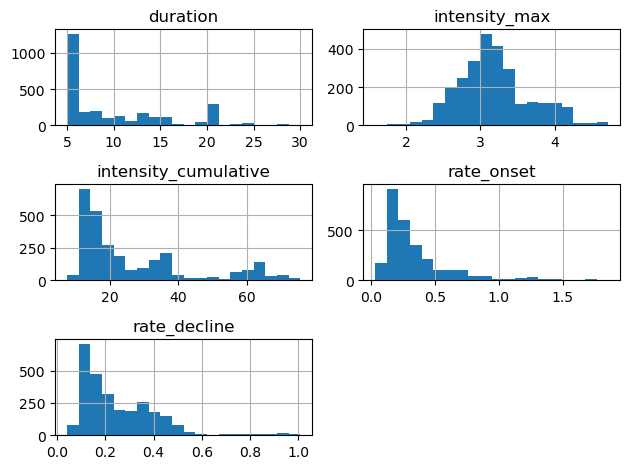

In [19]:
full_df.query('month == 1')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

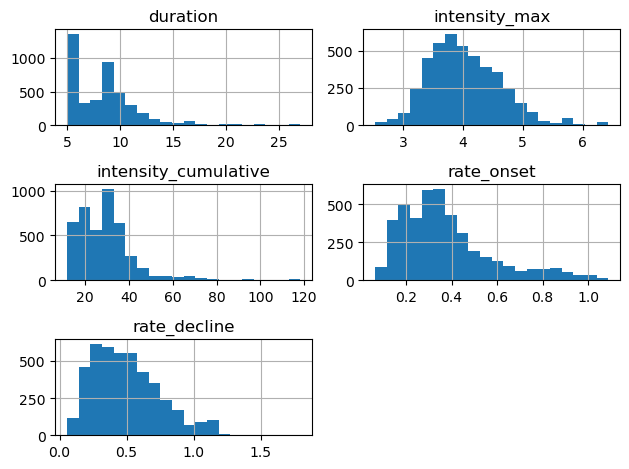

In [20]:
full_df.query('month == 5')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

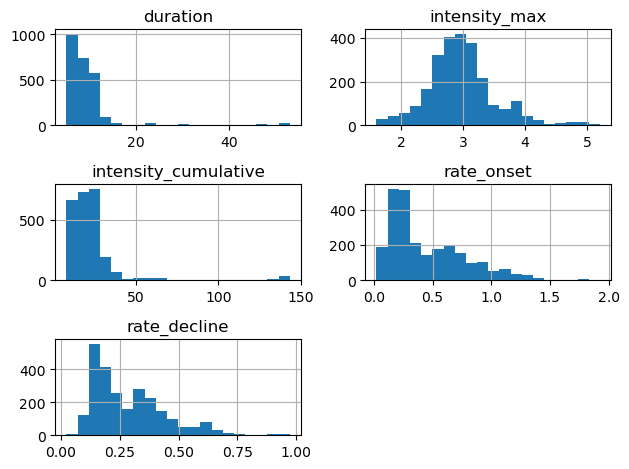

In [33]:
full_df.query('month == 11')[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].hist(bins=20)
plt.tight_layout()

### Back to regular analysis

In [22]:
occurences_avg = monthly_counts.groupby('month').mean()
occurences_std = monthly_counts.groupby('month').std()
occurences_st_err_mean = occurences_std.div(np.sqrt(monthly_counts.groupby('month').sum()), 
                                            axis='index')

In [23]:
occurences_st_err_mean.mean()

6.181035581685162

Averages and std for the characteristics

In [24]:
avgs = full_df.groupby(full_df.month)[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].median(numeric_only=True)

In [25]:
stds = full_df.groupby(full_df.month)[['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']].std(numeric_only=True)

In [26]:
stnd_err_median = stds.div(np.sqrt(monthly_counts.groupby('month').sum()), axis='index') * 1.2533

#### learning boxplots

In [54]:
df = full_df[['month', 'duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 'rate_decline']]

In [55]:
df

,month,duration,intensity_max,intensity_cumulative,rate_onset,rate_decline
0,10,6,2.495080,13.218272,0.224771,0.211811
1,5,5,3.323012,15.122185,0.252345,0.662094
2,8,7,1.683687,10.426784,0.086878,0.067465
3,9,10,2.279313,18.618927,0.159617,0.168256
4,1,23,3.973999,69.485384,0.265929,0.130366
...,...,...,...,...,...,...
45,1,8,2.520326,17.603593,0.354183,0.109757
46,2,28,5.754340,112.662811,0.211080,0.197811
47,4,20,7.127932,98.650488,0.301934,0.622755
48,7,5,3.622499,16.799217,0.276197,0.158937


In [59]:
melted_df = pd.melt(df, id_vars=['month'], 
        value_vars=
        ['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 
         'rate_decline']
       )

In [63]:
melted_df = melted_df.rename(columns={'variable': 'characteristic'})

matplotlib docs `bootstrap` parameter describe bootstrapping process
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

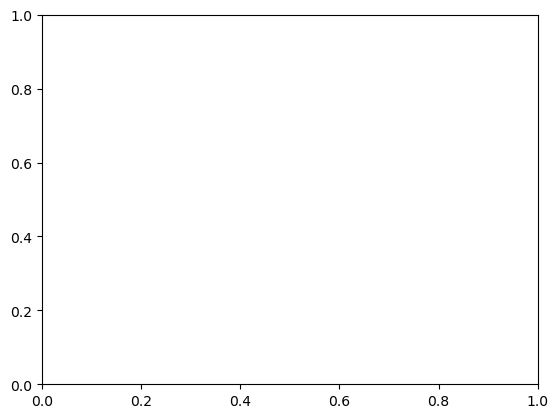

In [139]:
axes['new'] = plt.axes()

In [157]:
axes = axes.reindex(
    ['duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 
     'rate_decline']
)

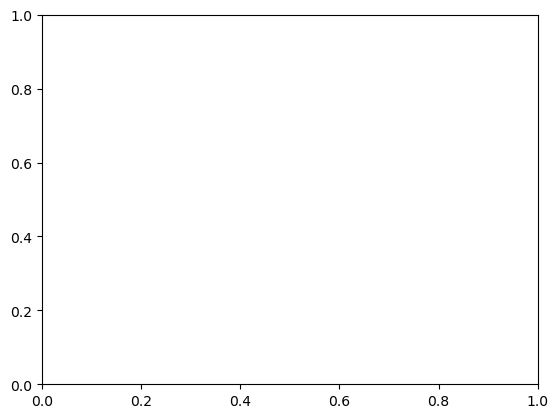

In [165]:
new_series = pd.Series(plt.axes(), index=['new'])

In [167]:
pd.concat([new_series, axes])

new                                   Axes(0.125,0.11;0.775x0.77)
duration                     Axes(0.1,0.679412;0.363636x0.220588)
intensity_max                Axes(0.1,0.414706;0.363636x0.220588)
intensity_cumulative    Axes(0.536364,0.679412;0.363636x0.220588)
rate_onset                       Axes(0.1,0.15;0.363636x0.220588)
rate_decline            Axes(0.536364,0.414706;0.363636x0.220588)
dtype: object

In [ ]:
axes.insert(0, 'new', plt.axes())

In [185]:
axes

array([<Axes: title={'center': 'duration'}, xlabel='[month]'>,
       <Axes: title={'center': 'intensity_cumulative'}, xlabel='[month]'>,
       <Axes: title={'center': 'intensity_max'}, xlabel='[month]'>,
       <Axes: title={'center': 'rate_decline'}, xlabel='[month]'>,
       <Axes: title={'center': 'rate_onset'}, xlabel='[month]'>],
      dtype=object)

In [195]:
boxplots

duration                     Axes(0.1,0.679412;0.363636x0.220588)
intensity_cumulative    Axes(0.536364,0.679412;0.363636x0.220588)
intensity_max                Axes(0.1,0.414706;0.363636x0.220588)
rate_decline            Axes(0.536364,0.414706;0.363636x0.220588)
rate_onset                       Axes(0.1,0.15;0.363636x0.220588)
dtype: object

In [199]:
axes

array([[<Axes: title={'center': 'Mean Number of MHW Pixels'}, xlabel='Month', ylabel='# of MHW Pixels'>,
        <Axes: title={'center': 'MHW Duration'}, xlabel='Month', ylabel='# of Days'>],
       [<Axes: title={'center': 'Maximum Intensity'}, xlabel='Month', ylabel='$^o$C'>,
        <Axes: title={'center': 'Cumulative Intensity'}, xlabel='Month', ylabel='$^o$C $\\times$ days'>],
       [<Axes: title={'center': 'Rate of Onset'}, xlabel='Month', ylabel='$^o$C/day'>,
        <Axes: title={'center': 'Rate of Decline'}, xlabel='Month', ylabel='$^o$C/day'>]],
      dtype=object)

**post on S)**

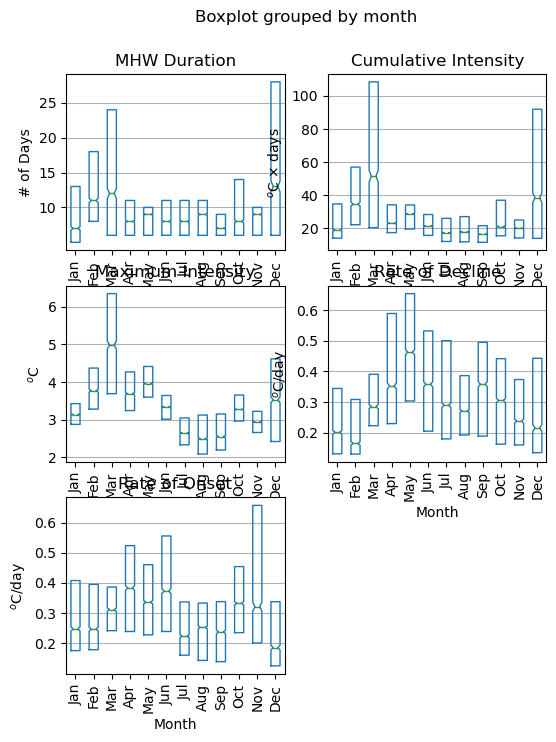

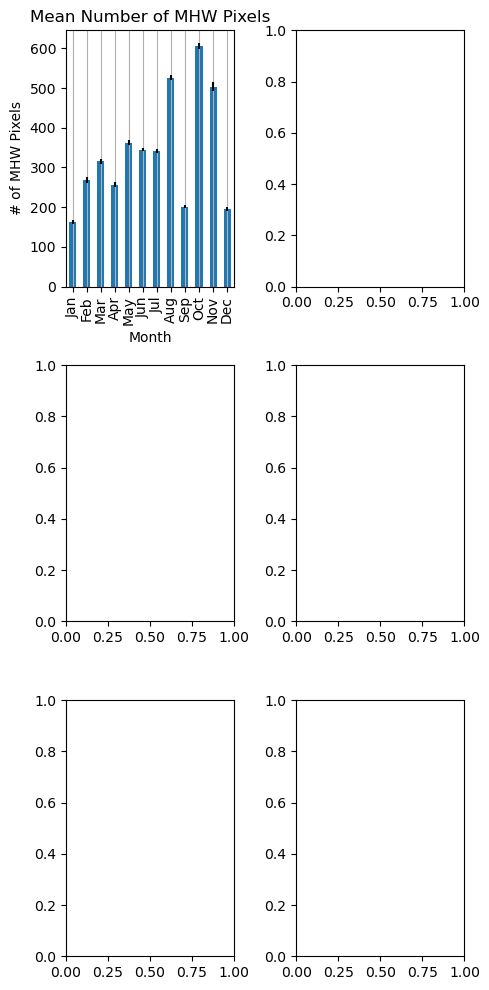

In [204]:
# only boostrap when saving the figure, because it takes several minutes
if SAVE_FIGS == True:
    bootstrap=2000
else:
    bootstrap=None

# plot box plots
boxplots = melted_df.groupby('characteristic').boxplot(
    by='month', figsize=(6, 8), sharey=False, whis=0, bootstrap=bootstrap,
    showfliers=False, showcaps=False, notch=True
)

# axes.duration.set_facecolor('red')
boxplots.duration.set_ylabel('# of Days')
boxplots.intensity_cumulative.set_ylabel(r'$^o$C $\times$ days')
boxplots.intensity_max.set_ylabel('$^o$C')
boxplots.rate_decline.set_ylabel('$^o$C/day')
boxplots.rate_onset.set_ylabel('$^o$C/day')

boxplots.duration.set_title('MHW Duration')
boxplots.intensity_cumulative.set_title('Cumulative Intensity')
boxplots.intensity_max.set_title('Maximum Intensity')
boxplots.rate_decline.set_title('Rate of Decline')
boxplots.rate_onset.set_title('Rate of Onset')

# increasing tick rate on plots where it is too low by default
boxplots.duration.set_yticks([10, 15, 20, 25]) 
boxplots.rate_decline.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6]) 
boxplots.rate_onset.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6])


fig, axes = plt.subplots(3, 2, figsize=(5, 10))

# plot mean MHW pixels
occurences_avg.plot(ax=axes[0, 0], kind='bar', title='Mean Number of MHW Pixels')
axes[0, 0].errorbar(range(0, 12), occurences_avg.values, yerr=occurences_st_err_mean.values,
                   fmt='none', ecolor='black')
axes[0, 0].set_ylabel('# of MHW Pixels')

axes[0, 1] = boxplots.duration
axes[1, 0] = boxplots.intensity_max
axes[1, 1] = boxplots.intensity_cumulative
axes[2, 0] = boxplots.rate_onset
axes[2, 1] = boxplots.rate_decline

del boxplots

# rearrange axes
# new_series = pd.Series(plt.axes(), index=['new'])
# axes = pd.concat([new_series, axes])
# axes = axes.reindex(
#     ['new', 'duration', 'intensity_max', 'intensity_cumulative', 'rate_onset', 
#      'rate_decline']
# )

# axes[2, 1] = axes.rate_decline
# axes[2, 0] = axes.rate_onset
# axes[1, 1] = axes.intensity_cumulative
# axes[1, 0] = axes.intensity_max
# axes[0, 1] = axes.duration

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
          'Oct', 'Nov', 'Dec']
for ax in axes.flatten():
    ax.set_xlabel('Month')
    # label months by name instead of number
    ax.set_xticklabels(months, rotation=90)
    # use only y axis gridlines
    ax.grid(axis='x')

plt.tight_layout()

plt.show()

In [43]:
df_plots = pd.DataFrame({'Group':['A','A','A','A','A','A','B','B','B','B','B','B'],
                         'Type':['X','X','X','Y','Y','Y','X','X','X','Y','Y','Y'],
                         'Value':[1,1.2,1.4,1.3,1.8,1.5,15,19,18,17,12,13]})
df_plots

,Group,Type,Value
0,A,X,1.0
1,A,X,1.2
2,A,X,1.4
3,A,Y,1.3
4,A,Y,1.8
5,A,Y,1.5
6,B,X,15.0
7,B,X,19.0
8,B,X,18.0
9,B,Y,17.0


A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

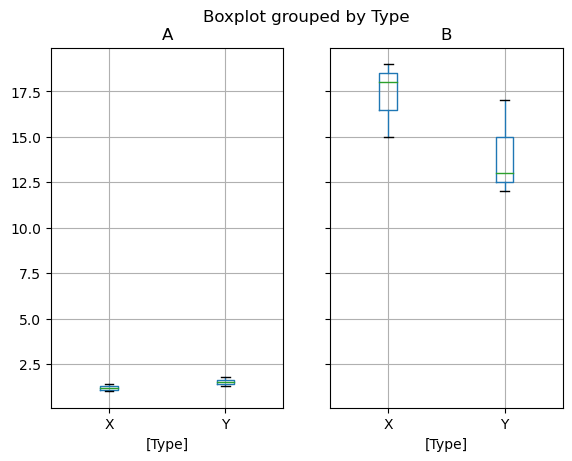

In [45]:
df_plots.groupby('Group').boxplot(by='Type')

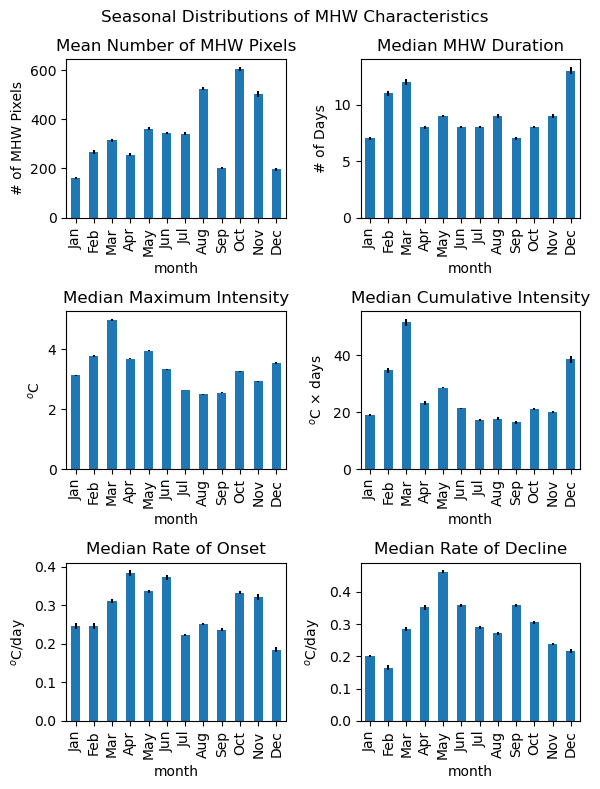

In [27]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(6, 8)
fig.suptitle('Seasonal Distributions of MHW Characteristics')

occurences_avg.plot(ax=axes[0, 0], kind='bar', title='Mean Number of MHW Pixels')
axes[0, 0].errorbar(range(0, 12), occurences_avg.values, yerr=occurences_st_err_mean.values,
                   fmt='none', ecolor='black')
axes[0, 0].set_ylabel('# of MHW Pixels')

avgs.duration.plot(ax=axes[0, 1], kind='bar', title='Median MHW Duration')
axes[0, 1].errorbar(range(0, 12), avgs.duration.values, yerr=stnd_err_median.duration.values,
                   fmt='none', ecolor='black')
axes[0, 1].set_ylabel('# of Days')

avgs.intensity_max.plot(ax=axes[1, 0], kind='bar', title='Median Maximum Intensity')
axes[1, 0].errorbar(range(0, 12), avgs.intensity_max.values, 
                    yerr=stnd_err_median.intensity_max.values,
                   fmt='none', ecolor='black')
axes[1, 0].set_ylabel('$^o$C')

avgs.intensity_cumulative.plot(ax=axes[1, 1], kind='bar', 
                               title='Median Cumulative Intensity')
axes[1, 1].errorbar(range(0, 12), avgs.intensity_cumulative.values, 
                    yerr=stnd_err_median.intensity_cumulative.values, 
                    fmt='none', ecolor='black')
axes[1, 1].set_ylabel(r'$^o$C $\times$ days')

avgs.rate_onset.plot(ax=axes[2, 0], kind='bar', title='Median Rate of Onset')
axes[2, 0].errorbar(range(0, 12), avgs.rate_onset.values, 
                    yerr=stnd_err_median.rate_onset.values,
                   fmt='none', ecolor='black')
axes[2, 0].set_ylabel('$^o$C/day')

avgs.rate_decline.plot(ax=axes[2, 1], kind='bar', title='Median Rate of Decline')
axes[2, 1].errorbar(range(0, 12), avgs.rate_decline.values, 
                    yerr=stnd_err_median.rate_decline.values,
                   fmt='none', ecolor='black')
axes[2, 1].set_ylabel('$^o$C/day')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
          'Oct', 'Nov', 'Dec']
for ax in axes.flatten():
    ax.set_xticks(np.linspace(0, 11, 12))
    ax.set_xticklabels(months)

plt.tight_layout()

if SAVE_FIGS:
    plt.savefig(os.path.join(REPO_ROOT, 'figures', 'seasonality.pdf'), dpi=450, 
                bbox_inches='tight')

In [100]:
seasons = np.full(event_statistics.shape, np.nan)
# seasons = [[0]*event_statistics.shape[1]]*event_statistics.shape[0]
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        df = pd.DataFrame(event_statistics[i, j])
        df.date_start = pd.to_datetime(df.date_start)
        if not df.empty:
        # df['month'] = df.date_start.dt.month
            df['season'] = df.apply(get_season, axis=1)
            seasons[i, j] = df.season.mode().iloc[0]  # TODO just picking one
        else:
            seasons[i, j] = np.nan

Most MHW definetly happen in summer

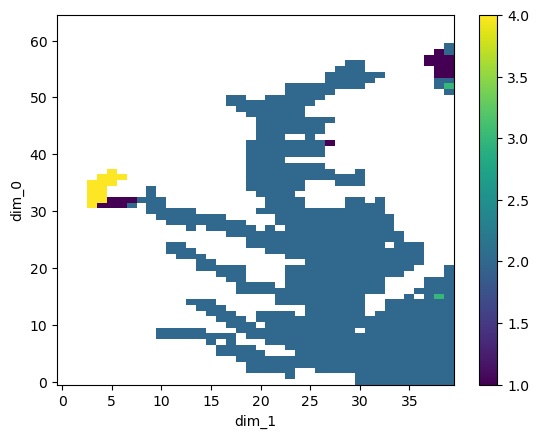

In [24]:
xr.DataArray(seasons).plot()

## Bigger and better: improved seasonality analysis

**TODO** using 16 km^2 for area for now, so it isn't an over estimate. Go back later and count more accurately.

In [25]:
# Not a good error. Worth reporting to pandas in a GH issue?
# Should just inform that index is out of range
counts.loc['2090-10-03']

NameError: name 'counts' is not defined

In [ ]:
counts = pd.DataFrame(index=pd.date_range('2002-01-01', '2023-12-31'), 
                      columns=['pixel_count'], data=0)

# Loop through each of the pixels in the AOI
for i in range(event_statistics.shape[0]):
    for j in range(event_statistics.shape[1]):
        # Loop through each MHW in that pixel
        stats_dict = event_statistics[i, j]
        # skip processing if there were no MHW in that pixel (land pixel)
        if len(stats_dict['date_start']) == 0:
               continue
        print('processing mhws')
        for mhw_idx in range(len(stats_dict['date_start'])):
            # Create a list of dates that experienced a MHW
            days = pd.date_range(
                stats_dict['date_start'][mhw_idx], stats_dict['date_end'][mhw_idx]
            )
            # Increment the counter for each of those dates
            for day in days:
                counts.loc[day] += 1

In [ ]:
counts.plot(logy=True, legend=False, figsize=(10, 3))

In [ ]:
counts['month'] = counts.index.month

In [ ]:
counts['area'] = counts['pixel_count'] * 16

In [ ]:
monthly_area = counts.groupby('month')['area'].sum()

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots()

ax.set_title('Total MHW Affected Area by Month')
monthly_area.plot(ax=ax, kind='bar', )
ax.set_xticklabels(months)
ax.set_ylabel('Total Area ($km^2$)')
ax.set_xlabel('Month')

if SAVE_FIGS:
    plt.savefig('../figures/seasonality.pdf', dpi=450, 
                bbox_inches='tight')